## Access to Zarr Data

Some datasets from the Open Data Portal have been migrated to the Zarr format. This allows for faster opening and processing, so it makes sense to check whether data is provided in the Zarr format first.

The data is available via store abbreviation 'cci-zarr-store'.

In [1]:
from xcube.core.store import new_data_store

In [2]:
zarr_store = new_data_store('esa-cci-zarr')

Again, let's see what data sets are available. 

In [3]:
datasets = zarr_store.list_data_ids()
datasets

['ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2018-fv2.0.zarr',
 'ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2020-fv4.0.zarr',
 'ESACCI-GHG-L2-CH4-SCIAMACHY-WFMD-2002-2011-fv1.zarr',
 'ESACCI-GHG-L2-CO2-OCO-2-FOCAL-2014-2021-v10.zarr',
 'ESACCI-GHG-L2-CO2-SCIAMACHY-WFMD-2002-2012-fv1.zarr',
 'ESACCI-ICESHEETS_Antarctica_GMB-2002-2016-v1.1.zarr',
 'ESACCI-ICESHEETS_Greenland_GMB-2003-2016-v1.1.zarr',
 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2020-fv2.0.zarr',
 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr',
 'ESACCI-LAKES-L3S-LK_PRODUCTS-MERGED-1992-09-fv2.0.1.zarr',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_DAY-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_NIGHT-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01deg_1DAILY_DAY-1995-2020-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01deg_1DAILY_NIG

The names are similar but different to the ones from the Climate Toolbox store.
We can have a look at a dataset's metadata to find out more about it.

In [4]:
zarr_store.describe_data('ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-1978-2021-fv07.1.zarr')

Cubes can easily be opened from the store like this:

In [5]:
cube = zarr_store.open_data('ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-1978-2021-fv07.1.zarr')
cube

<xarray.Dataset>
Dimensions:         (time: 15767, lat: 720, lon: 1440)
Coordinates:
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time            (time) datetime64[ns] 1978-11-01 1978-11-02 ... 2021-12-31
Data variables:
    dnflag          (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    flag            (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    freqbandID      (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    mode            (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    sensor          (time, lat, lon) float64 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    sm              (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    sm_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    t0              (time, lat, lon) float64 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                  CF-1.9
    cdm_data_type:                Grid
    comment:                      This dataset was produced with funding of t...
    contact:                      cci_sm_contact@eodc.eu
    creator_email:                cci_sm_developer@eodc.eu
    creator_name:                 Department of Geodesy and Geoinformation, V...
    ...                           ...
    time_coverage_end_product:    20211231T235959Z
    time_coverage_resolution:     P1D
    time_coverage_start:          1978-11-01 00:00:00
    time_coverage_start_product:  19781101T000000Z
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    tracking_id:                  ad35798e-58e0-488f-b5b9-593874a47700

Subsets of the data may easily be created like this:

In [6]:
sub_cube = cube.sel({
    'lat': slice(40.40, -40.40),
    'lon': slice(-23.40, 57.40),
    'time': slice('2000-01-01', '2000-12-31')
    }
)
sub_cube

<xarray.Dataset>
Dimensions:         (time: 366, lat: 324, lon: 324)
Coordinates:
  * lat             (lat) float64 40.38 40.12 39.88 ... -39.88 -40.12 -40.38
  * lon             (lon) float64 -23.38 -23.12 -22.88 ... 56.88 57.12 57.38
  * time            (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    dnflag          (time, lat, lon) float32 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
    flag            (time, lat, lon) float32 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
    freqbandID      (time, lat, lon) float32 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
    mode            (time, lat, lon) float32 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
    sensor          (time, lat, lon) float64 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
    sm              (time, lat, lon) float32 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
    sm_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
    t0              (time, lat, lon) float64 dask.array<chunksize=(13, 324, 94), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                  CF-1.9
    cdm_data_type:                Grid
    comment:                      This dataset was produced with funding of t...
    contact:                      cci_sm_contact@eodc.eu
    creator_email:                cci_sm_developer@eodc.eu
    creator_name:                 Department of Geodesy and Geoinformation, V...
    ...                           ...
    time_coverage_end_product:    20211231T235959Z
    time_coverage_resolution:     P1D
    time_coverage_start:          1978-11-01 00:00:00
    time_coverage_start_product:  19781101T000000Z
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    tracking_id:                  ad35798e-58e0-488f-b5b9-593874a47700

... and we can plot the data.

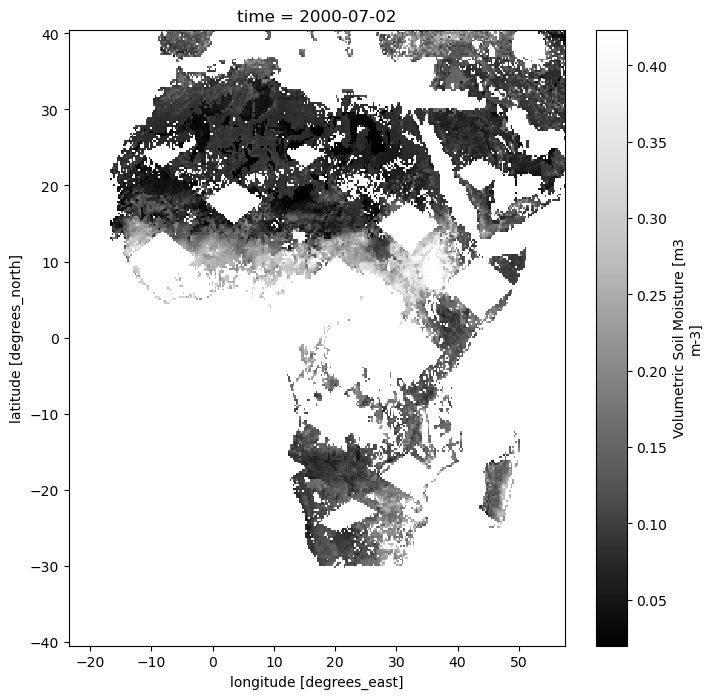

In [7]:
sub_cube.sm.sel(time='2000-07-01 12:00:00', method='nearest').plot.imshow(cmap='Greys_r', figsize=(8, 8))